In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
%matplotlib inline

annotation_dir = os.path.join(os.getcwd(), 'dataset', 'annotations')
img_dir = os.path.join(os.getcwd(),'dataset','images')  

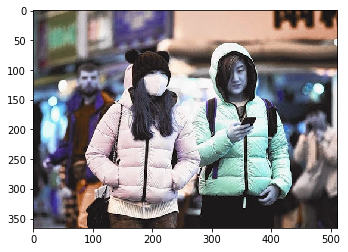

In [2]:
#take a look at one of the pictures in the dataset
img = cv2.imread(img_dir+ '/maksssksksss0.png')
plt.imshow(img)

We noticed that one picture could contain more than one people. For the picture above, the corresponding annotation recorded three objects (Two of them are labeled as 'without_mask', one labeled as 'with_mask')

The task is to preprocess the raw dataset. From the XML files, we can read the filepath of the corresponding image, and all the informations about the objects in the image, including their label (with mask or not, or weared incorrectly) and the Region of Interest. 

We need to get the Region of Interest of each object and their label.

In [3]:
#define a funtion to get infomations of an object. Return a list showing the label and the ROI [label, xmin, xmax, ymin, ymax]
def object_data(obj):
    label = obj.find('name').text
    box = obj.find('bndbox')
    xmin = int(box.find('xmin').text)
    xmax = int(box.find('xmax').text)
    ymin = int(box.find('ymin').text)
    ymax = int(box.find('ymax').text)
    return [label, xmin, xmax, ymin, ymax]

In [15]:
# loop through the annotation files, 
data = []
for root, dirs, files in os.walk(annotation_dir):
    for file in files:
        tree = ET.parse(os.path.join(root,file))
        filename = tree.find('filename').text
        img_path = os.path.join(img_dir,filename)
        img_data = {'path': img_path, 'object' : []}
        #get all the object data 
        for obj in tree.findall('object'):
            obj_data = object_data(obj)
            img_data['object'].append(obj_data)
    
        data.append(img_data)
# The list data look like [{'path':xxx, 'object' : [[label0,xmin0, xmax0, ymin0, ymax0],[label1,xmin1, xmax1, ymin1, ymax1]]},
#                           {'path':xxx, 'object' : [[label2,xmin2, xmax2, ymin2, ymax2]]}...]

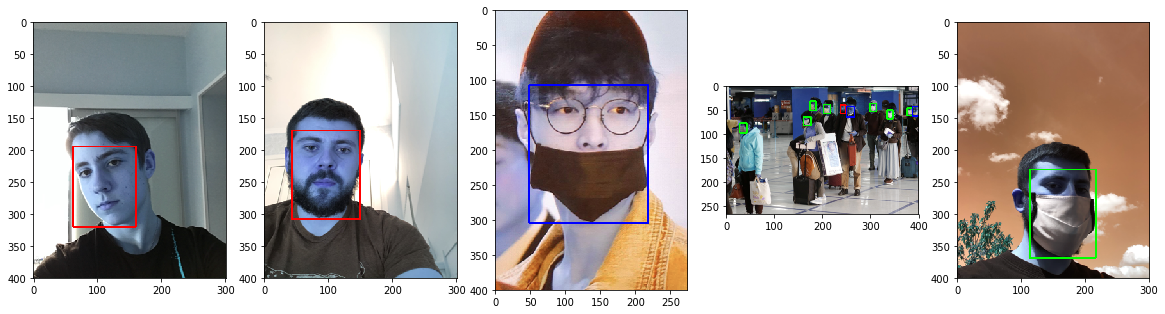

In [16]:
label_color = {'with_mask':(0,255,0),'without_mask':(255,0,0),'mask_weared_incorrect':(0,0,255)}
fig= plt.figure(figsize = (20,10))
for i in range(5):
    path = data[i]['path']
    img = cv2.imread(path)
    for j in data[i]['object']:
        label, xmin, xmax, ymin, ymax = j[0],j[1],j[2],j[3],j[4]
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), label_color[label], 2)
    fig.add_subplot(1,5,i+1)
    plt.imshow(img)



In [19]:
face_data = []
label_data = []

for image in data:
    path = image['path']
    img = cv2.imread(path)
    for obj in image['object']:
        label, xmin, xmax, ymin, ymax = obj[0],obj[1],obj[2],obj[3],obj[4]
        face = img[ymin:ymax, xmin:xmax]
        face_data.append(face)
        label_data.append(label)
        

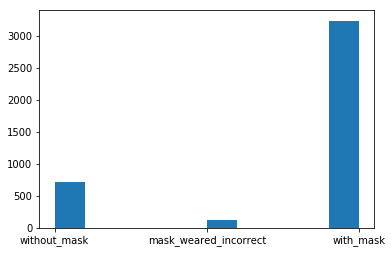

In [32]:
plt.hist(label_data);
plt.show()